<a href="https://colab.research.google.com/github/thejacklerine/Boston-Housing-Regression-PyTorch/blob/main/BostonHousing_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      crim    zn  indus  chas    nox     rm    age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.6

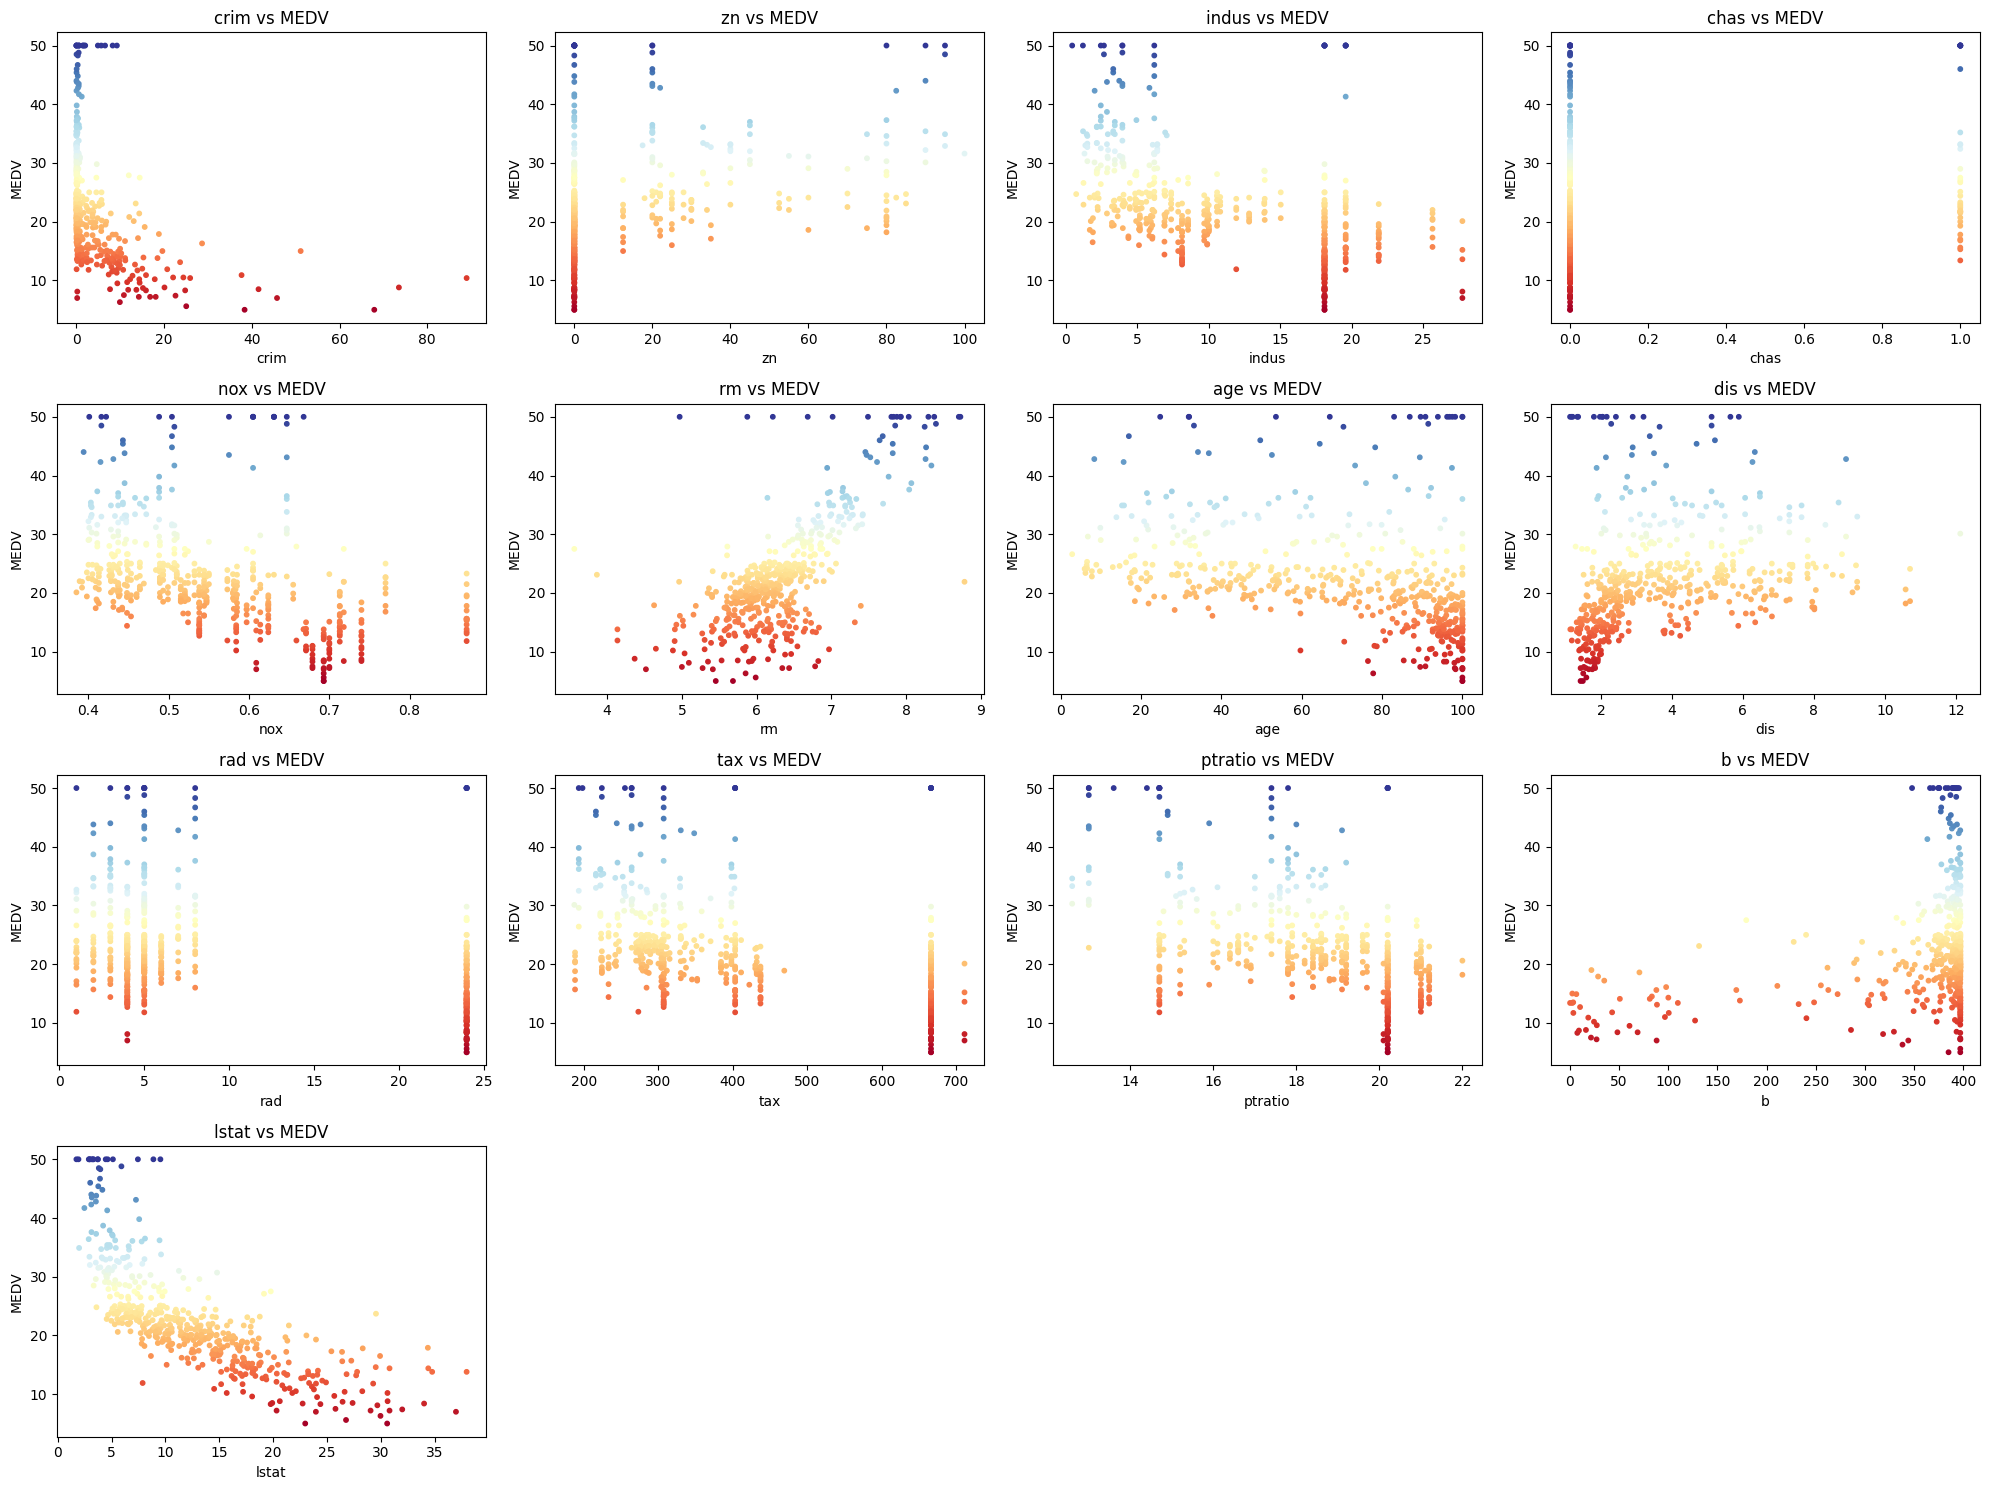

In [64]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
print (df.head(10))
X = df.drop("medv", axis=1).values
y = df["medv"].values
print(f" X {X[:10]}")
print(f" Y{y[:10]}")
#Visalize
feature_names = df.columns[:-1]
plt.figure(figsize=(20, 15))
for i in range(13):
    plt.subplot(4, 4, i + 1)
    plt.scatter(X[:, i], y, c=y, cmap=plt.cm.RdYlBu, s=10)
    plt.xlabel(feature_names[i])
    plt.ylabel("MEDV")
    plt.title(f"{feature_names[i]} vs MEDV")

plt.tight_layout()
plt.show()

In [65]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(f"training data {X_train[:10]}")
print(f"testing data {X_test[:10]}")
print(f"training output {y_train[:10]}")
print(f"testing output {y_test[:10]}")

training data [[5.51500e-02 3.30000e+01 2.18000e+00 0.00000e+00 4.72000e-01 7.23600e+00
  4.11000e+01 4.02200e+00 7.00000e+00 2.22000e+02 1.84000e+01 3.93680e+02
  6.93000e+00]
 [3.55100e-02 2.50000e+01 4.86000e+00 0.00000e+00 4.26000e-01 6.16700e+00
  4.67000e+01 5.40070e+00 4.00000e+00 2.81000e+02 1.90000e+01 3.90640e+02
  7.51000e+00]
 [1.64390e-01 2.20000e+01 5.86000e+00 0.00000e+00 4.31000e-01 6.43300e+00
  4.91000e+01 7.82650e+00 7.00000e+00 3.30000e+02 1.91000e+01 3.74710e+02
  9.52000e+00]
 [2.92400e+00 0.00000e+00 1.95800e+01 0.00000e+00 6.05000e-01 6.10100e+00
  9.30000e+01 2.28340e+00 5.00000e+00 4.03000e+02 1.47000e+01 2.40160e+02
  9.81000e+00]
 [1.51902e+00 0.00000e+00 1.95800e+01 1.00000e+00 6.05000e-01 8.37500e+00
  9.39000e+01 2.16200e+00 5.00000e+00 4.03000e+02 1.47000e+01 3.88450e+02
  3.32000e+00]
 [3.15000e-02 9.50000e+01 1.47000e+00 0.00000e+00 4.03000e-01 6.97500e+00
  1.53000e+01 7.65340e+00 3.00000e+00 4.02000e+02 1.70000e+01 3.96900e+02
  4.56000e+00]
 [4.6296

In [66]:
# Normalize
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f"training data {X_train[:10]}")
print(f"testing data {X_test[:10]}")


training data [[5.18056442e-04 3.47368421e-01 3.65623822e-02 0.00000000e+00
  1.79012346e-01 6.85987391e-01 3.93408857e-01 2.63019578e-01
  2.60869565e-01 6.67938931e-02 6.17021277e-01 9.91833629e-01
  1.43487859e-01]
 [2.97300779e-04 2.63157895e-01 1.37580098e-01 0.00000000e+00
  8.43621399e-02 4.68578401e-01 4.51081359e-01 3.88391274e-01
  1.30434783e-01 1.79389313e-01 6.80851064e-01 9.84123764e-01
  1.59492274e-01]
 [1.74592552e-03 2.31578947e-01 1.75273276e-01 0.00000000e+00
  9.46502058e-02 5.22676429e-01 4.75798146e-01 6.08980713e-01
  2.60869565e-01 2.72900763e-01 6.91489362e-01 9.43723054e-01
  2.14955850e-01]
 [3.27642318e-02 0.00000000e+00 6.92423671e-01 0.00000000e+00
  4.52674897e-01 4.55155583e-01 9.27909372e-01 1.04920478e-01
  1.73913043e-01 4.12213740e-01 2.23404255e-01 6.02485417e-01
  2.22958057e-01]
 [1.69721090e-02 0.00000000e+00 6.92423671e-01 1.00000000e+00
  4.52674897e-01 9.17632703e-01 9.37178167e-01 9.38810028e-02
  1.73913043e-01 4.12213740e-01 2.23404255e-01

In [67]:
# #Check the model current device
# next(model_1.parameters()).device
# #set the model to use the target device
# model_1.to(device)
# next(model_1.parameters()).device

In [68]:
#Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print (f"Using device: {device}")

Using device: cpu


In [69]:
# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [70]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())




In [71]:



def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data =X_test,
                    test_labels = y_test,
                    predictions =None):
  """
  Plots training data, test data and compares predictions.
  """
  # Determine the number of features
  num_features = train_data.shape[1]

  # Plot each feature against the labels
  for i in range(num_features):
    plt.figure(figsize=(10,7))
    # Plot training data in blue
    plt.scatter(train_data[:, i], train_labels, c="b", s= 4, label=f"Training data (Feature {i+1})")
    # plot test data in green
    plt.scatter(test_data[:, i], test_labels, c="g", s= 4, label=f"Testing data (Feature {i+1})")
    # Are there predictions?
    if predictions is not None:
      #Plot the prediction if they exist
      # Reshape predictions to match test_data[:, i] shape for plotting
      plt.scatter(test_data[:, i], predictions, c="r", s=4, label= f"Predictions (Feature {i+1})")


    # Show the legend
    plt.legend(prop={"size": 14})
    plt.xlabel(f"Feature {i+1}")
    plt.ylabel("Medv")
    plt.title(f"Feature {i+1} vs Medv")
    plt.show()



In [72]:
## Create s linear regression model by subclassing nn.Model
# class LinearRegressionModelV2(nn.Module):
#   def __init__(self):
#     super().__init__()
#     # Use nn.Linear() for creating the model parameters
#     self.linear_layer1 = nn.Linear(in_features = 13, out_features =64) #preexisting function for making a layer.
#     self.linear_layer2 = nn.Linear(in_features = 64, out_features =1)

#   def forward(self, x: torch.Tensor) -> torch.Tensor:
#     return self.linear_layer2(x)
model_1 = nn.Sequential(
    nn.Linear(in_features=13, out_features=16), nn.ReLU(),
    # nn.Linear(in_features=32, out_features=16),nn.ReLU(),
    # nn.Linear(in_features=16, out_features=4),nn.ReLU(),
    nn.Linear(in_features=16, out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=13, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=1, bias=True)
)

X_train: torch.Size([303, 13])
y_train: torch.Size([303, 1])
X_test: torch.Size([203, 13])
y_test: torch.Size([203, 1])
y_preds: torch.Size([203, 1])


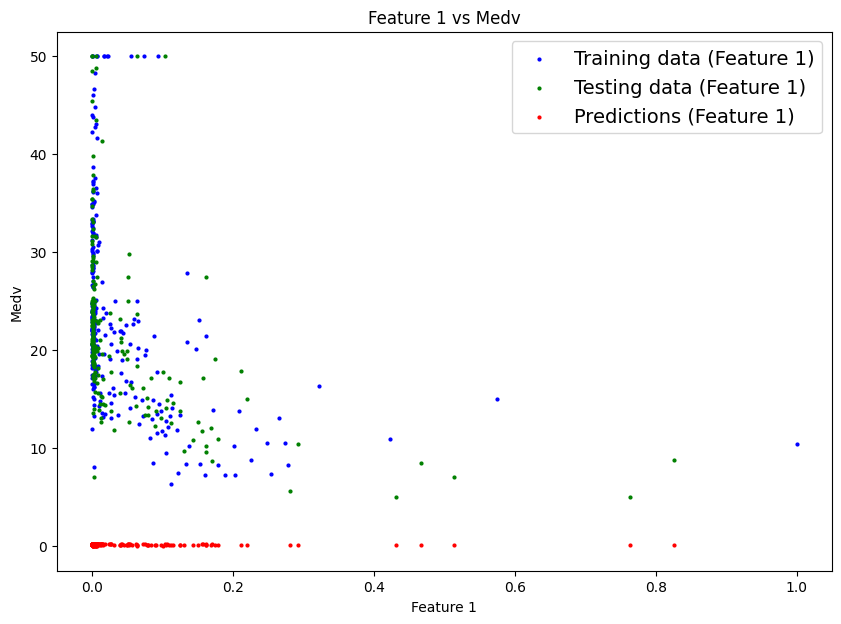

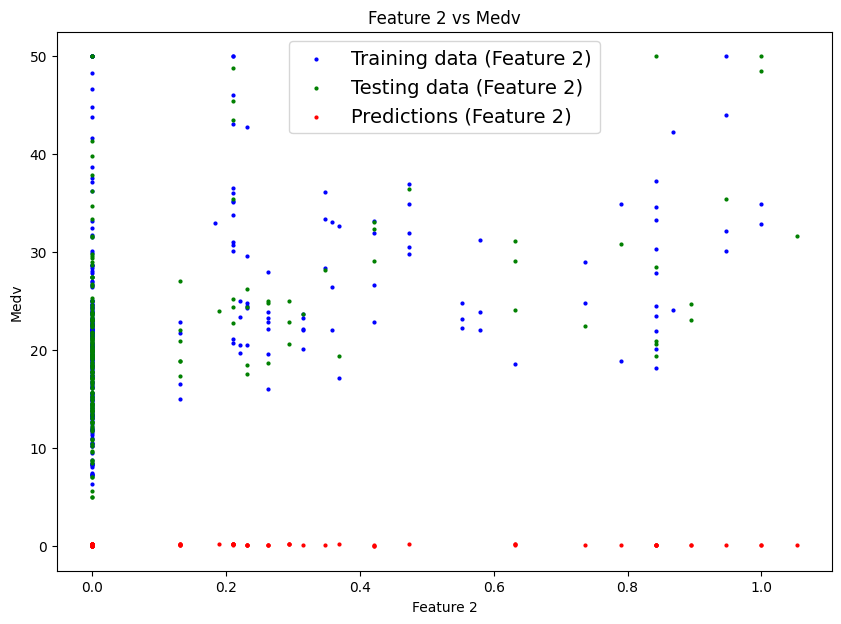

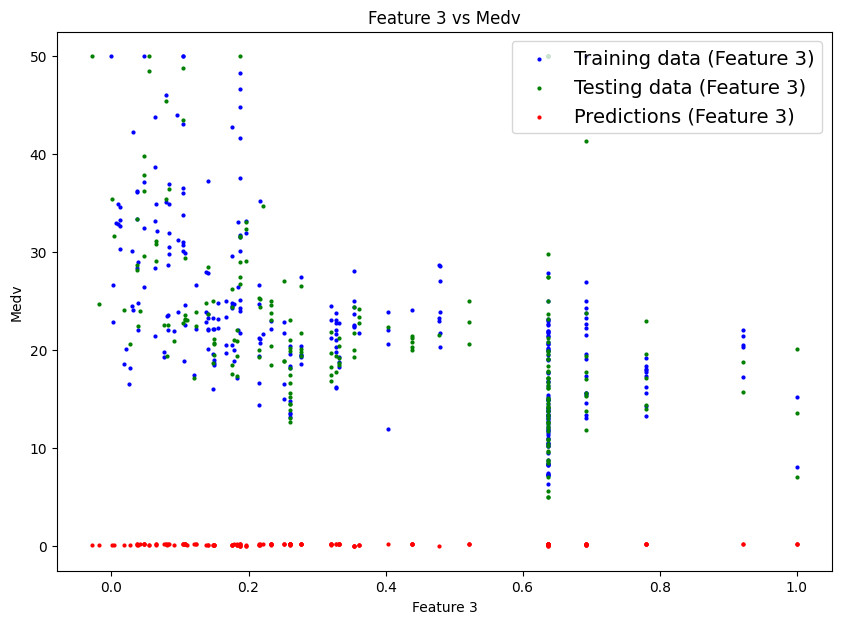

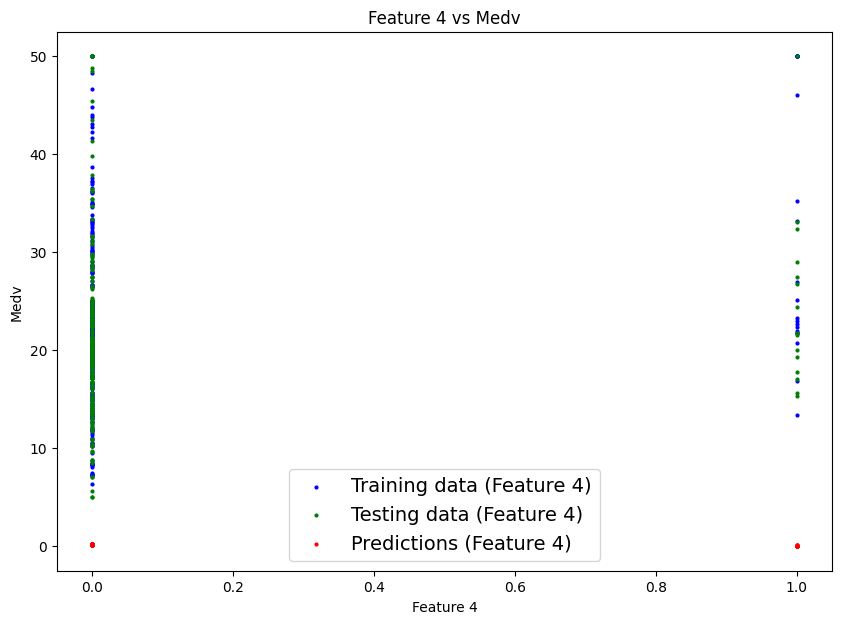

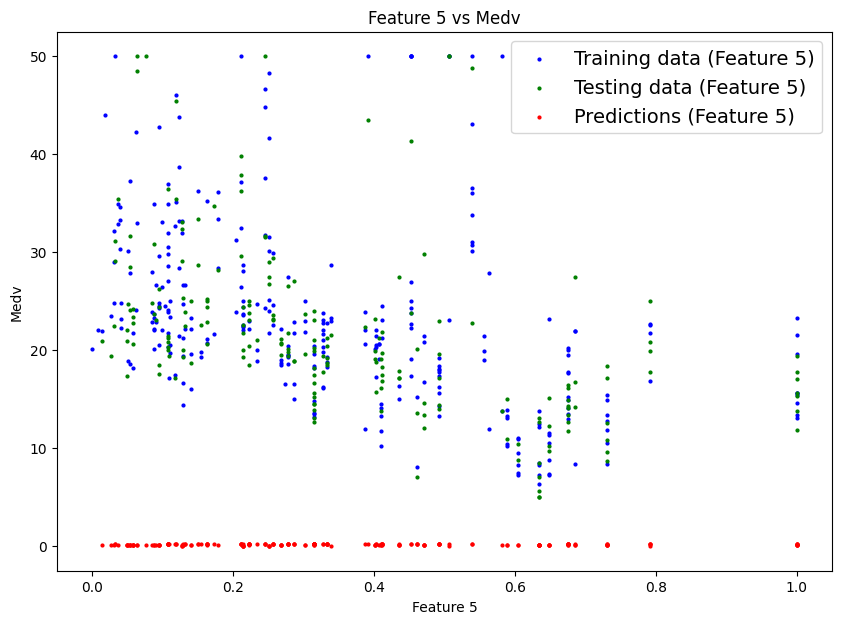

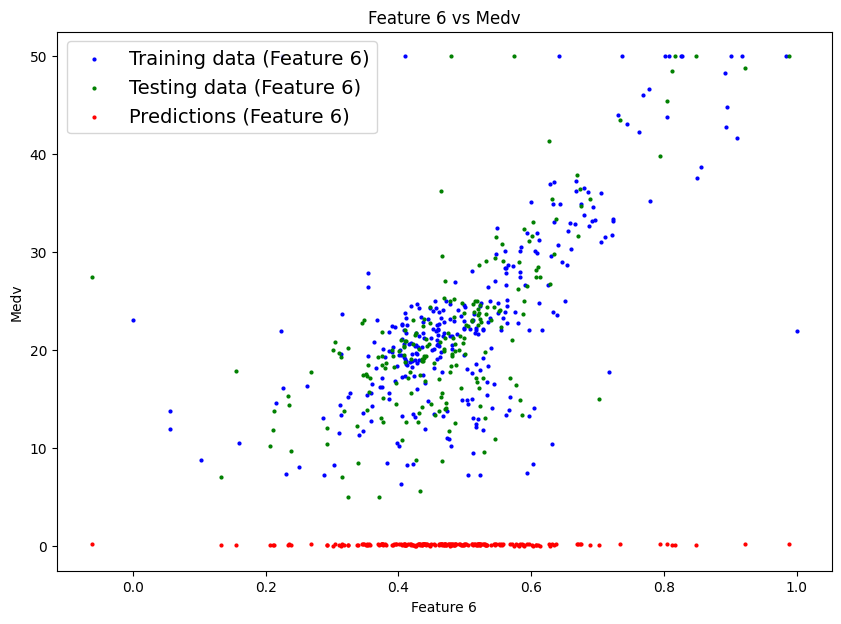

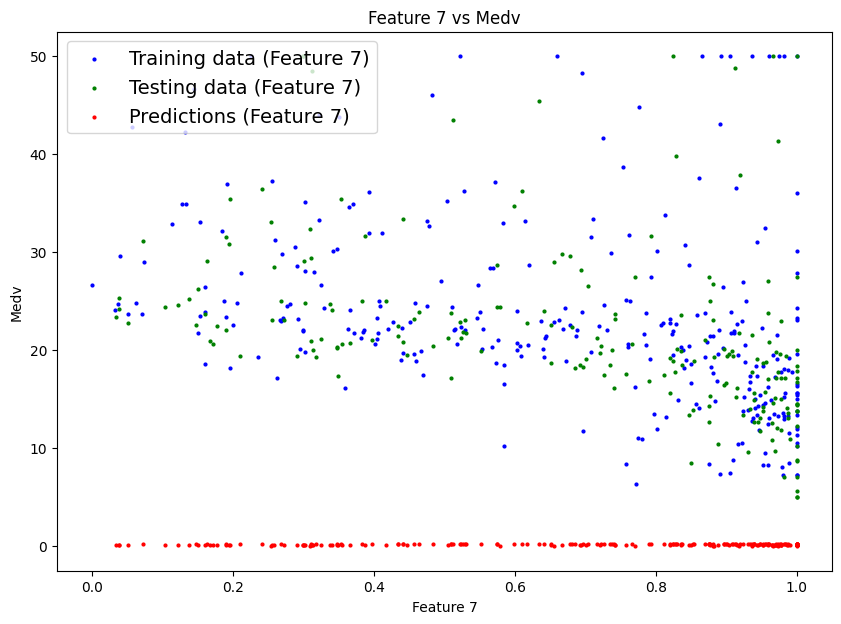

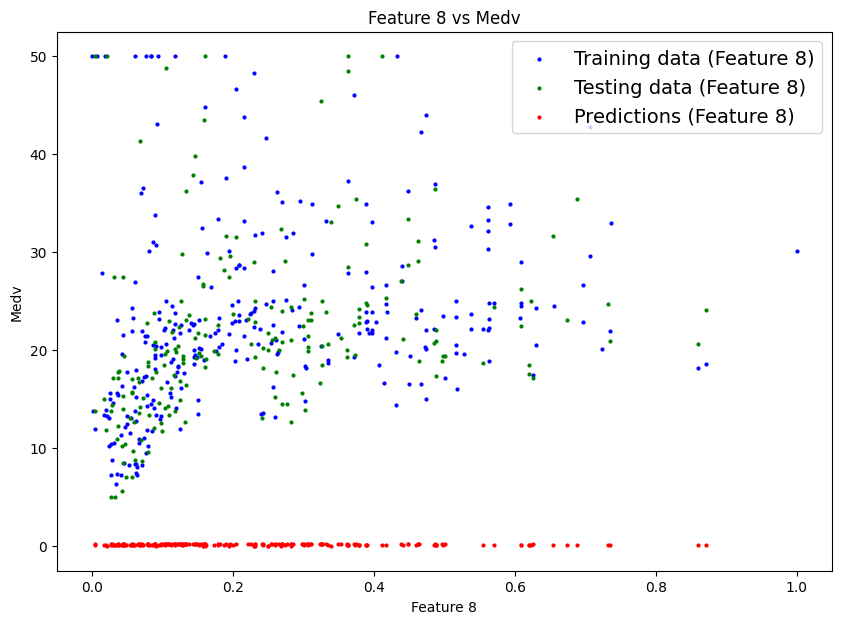

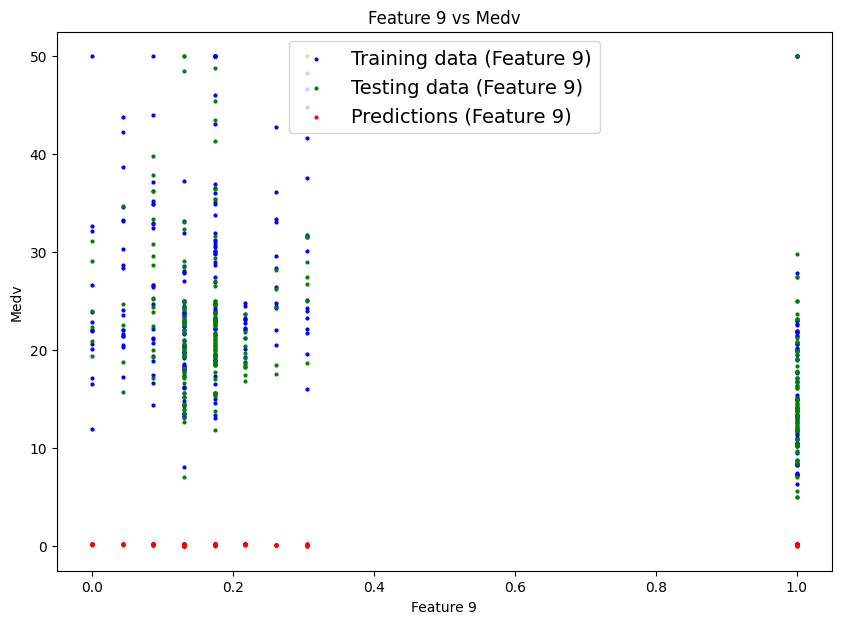

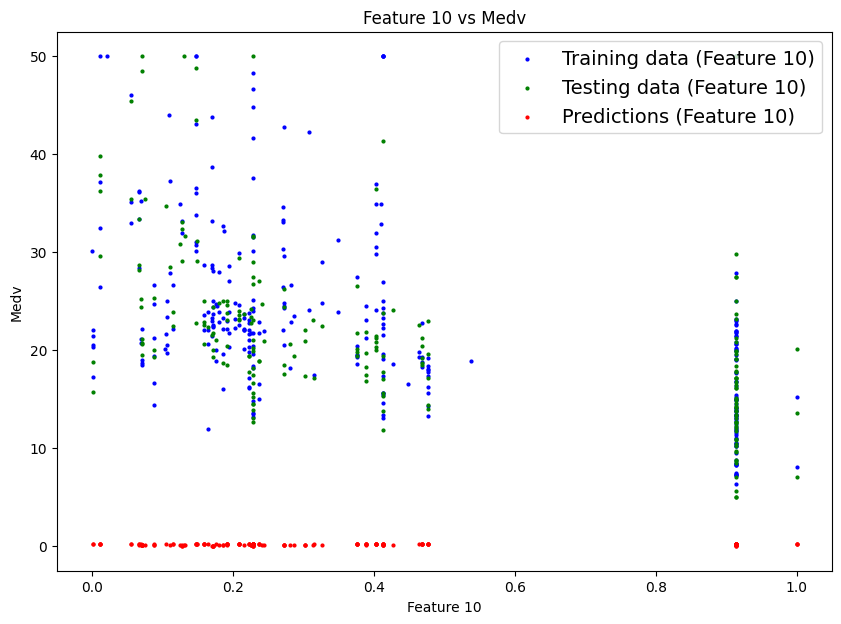

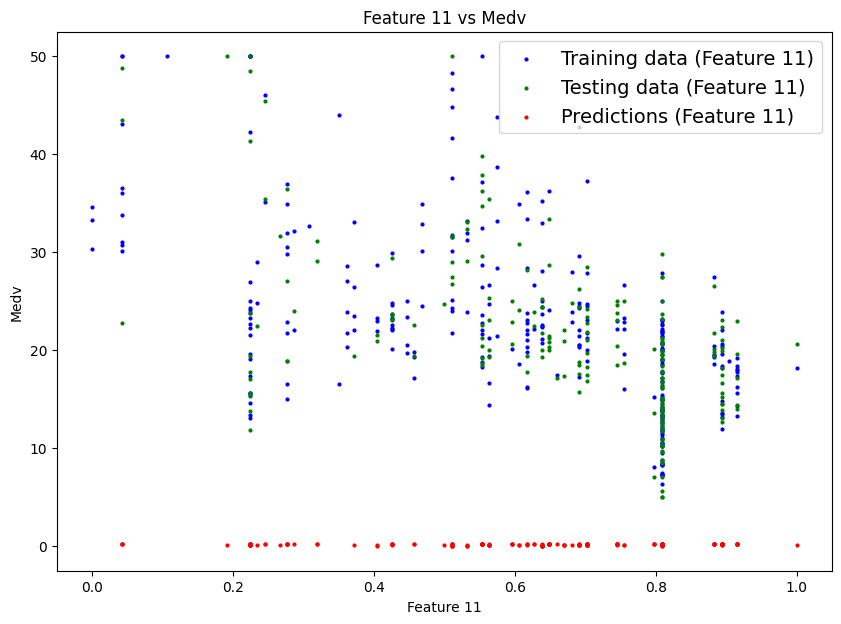

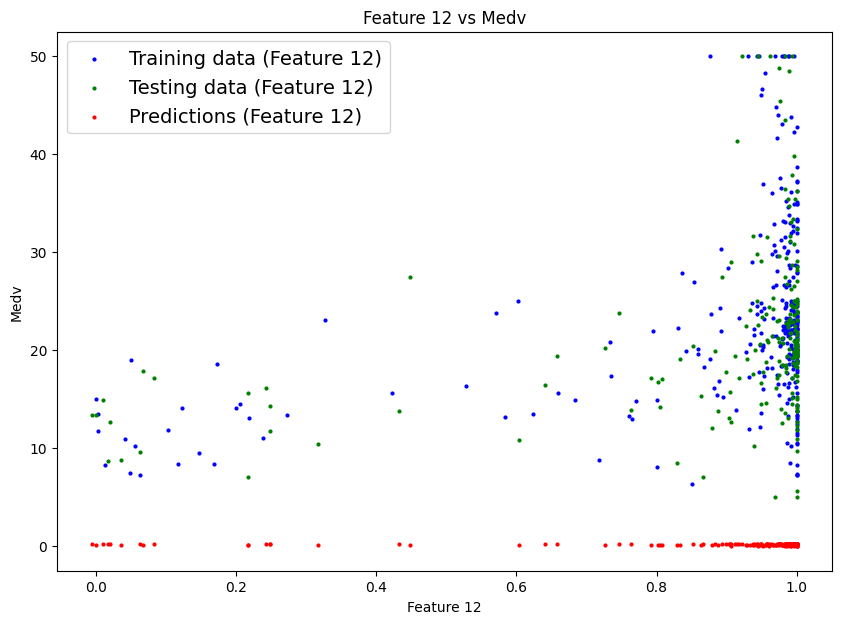

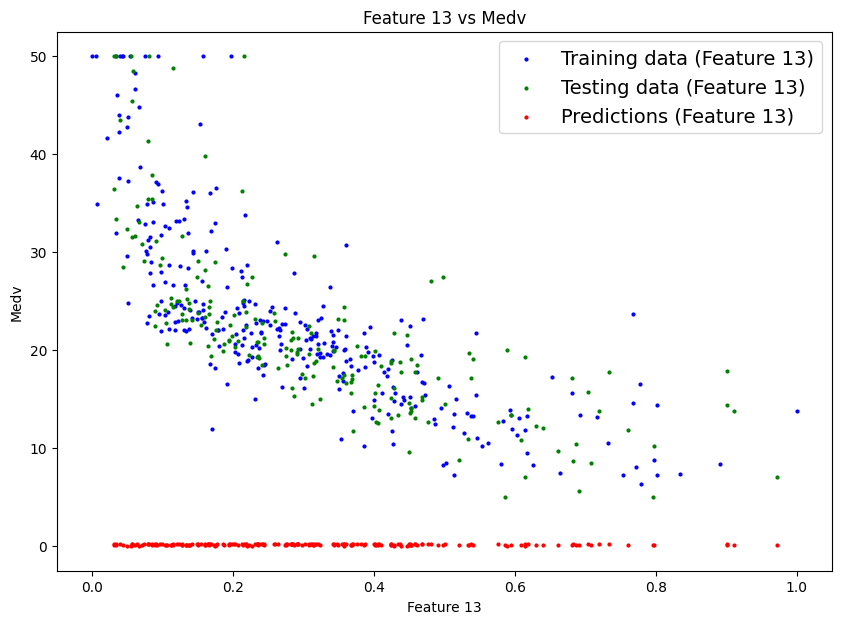

In [73]:
# Make prediction with model
with torch.inference_mode():  # remove the track of gradients that we use during train
  y_preds = model_1(X_test)
# Flatten y_pred to 1D if needed
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)
print("y_preds:", y_preds.shape)


plot_predictions(train_data=X_train,
                 train_labels=y_train.squeeze(),
                 test_data=X_test,
                 test_labels= y_test.squeeze(),
                 predictions=y_preds.squeeze())

In [74]:

# Set the manual seed
torch.manual_seed(42)
model_1, model_1.state_dict()

# Setup loss function
loss_fn = nn.MSELoss() # same as MAE

#Setup our optimizer
optimizer = torch.optim.Adam(params= model_1.parameters(), lr = 1e-3, weight_decay=1e-5)

# calculate accuracy - out of 100 examples, what percentage does model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [75]:
#Let's write a training loop
torch.manual_seed(42)

epochs = 5000
best_loss = float('inf')      # initialize best validation loss
patience = 20                 # number of epochs to wait
patience_counter = 0

#Put the data on the target device (device agbostic code for data)
X_train = X_train.to(device)
y_train= y_train.to(device)
X_test= X_test.to(device)
y_test = y_test.to(device)

# Initialize lists to store losses for plotting
train_losses = []
test_losses = []


for epoch in range(epochs):
  model_1.train()

  #forward pass
  y_pred = model_1(X_train)

  # Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #Optimizer zero grad
  optimizer.zero_grad()

  #Perform backpropagation
  loss.backward()

  # Optimizer step
  optimizer.step()

  ####Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred.round())

  # Append losses to lists
  train_losses.append(loss)
  test_losses.append(test_loss)


  #print out whats happening

  if epoch % 100 ==0:
    print(f"Epoch: {epoch}| Loss: {loss}| test loss: {test_loss}| test accuracy: {test_acc:.2f}%")

  if test_loss < best_loss:
        best_loss = test_loss
        patience_counter = 0
        best_model_state = model_1.state_dict()  # save best model
  else:
    patience_counter += 1
    if patience_counter >= patience:
      print("⏹️ Early stopping triggered")
      break

Epoch: 0| Loss: 617.068115234375| test loss: 538.1365966796875| test accuracy: 0.00%
Epoch: 100| Loss: 555.18115234375| test loss: 479.2601623535156| test accuracy: 0.00%
Epoch: 200| Loss: 417.9114990234375| test loss: 351.0820617675781| test accuracy: 0.00%
Epoch: 300| Loss: 272.3426208496094| test loss: 220.32437133789062| test accuracy: 0.00%
Epoch: 400| Loss: 177.8529815673828| test loss: 142.50564575195312| test accuracy: 0.00%
Epoch: 500| Loss: 137.20648193359375| test loss: 114.40386199951172| test accuracy: 0.00%
Epoch: 600| Loss: 119.31237030029297| test loss: 102.9874267578125| test accuracy: 1.48%
Epoch: 700| Loss: 106.53052520751953| test loss: 93.0986099243164| test accuracy: 0.99%
Epoch: 800| Loss: 95.28865051269531| test loss: 83.41510772705078| test accuracy: 0.49%
Epoch: 900| Loss: 83.65165710449219| test loss: 72.58734893798828| test accuracy: 0.00%
Epoch: 1000| Loss: 72.44927978515625| test loss: 62.45096206665039| test accuracy: 0.49%
Epoch: 1100| Loss: 63.866516113

In [76]:
model_1.state_dict()
print(test_loss)

tensor(16.4302)


In [77]:
#turn model into evaluation mode
model_1.eval()

# Make prediction on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)


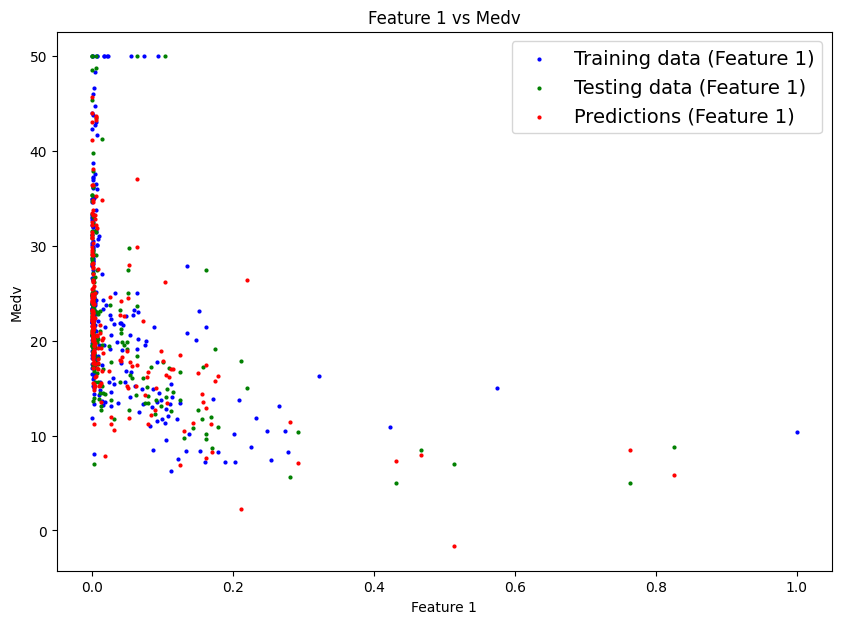

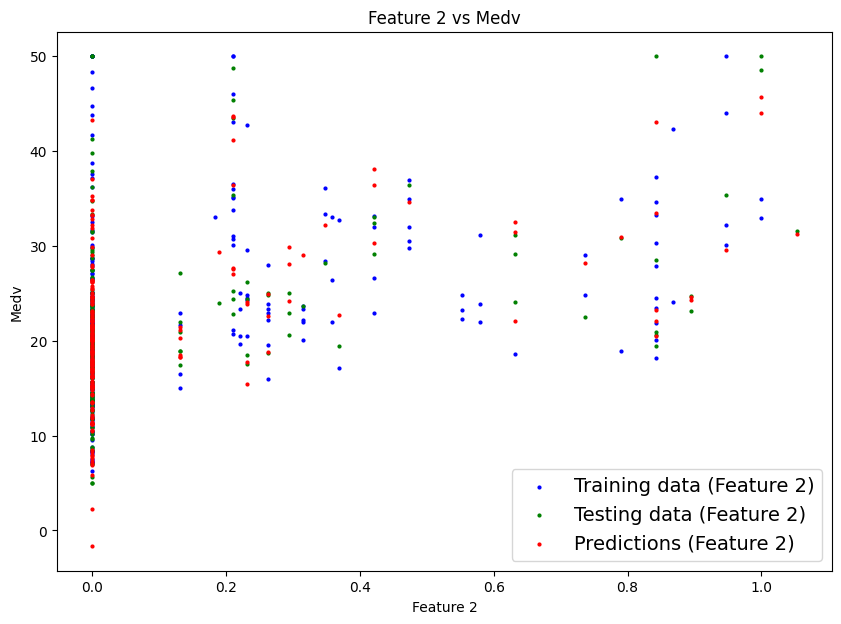

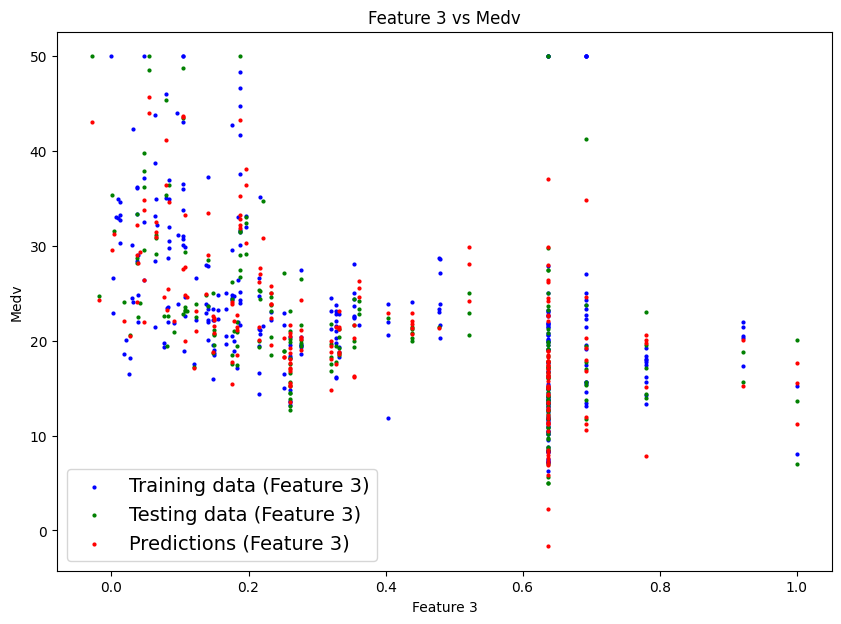

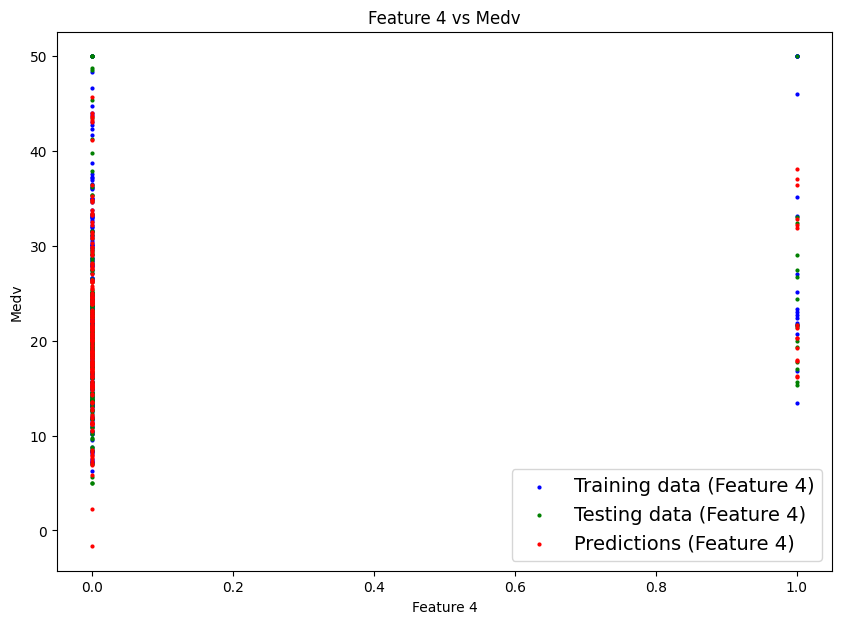

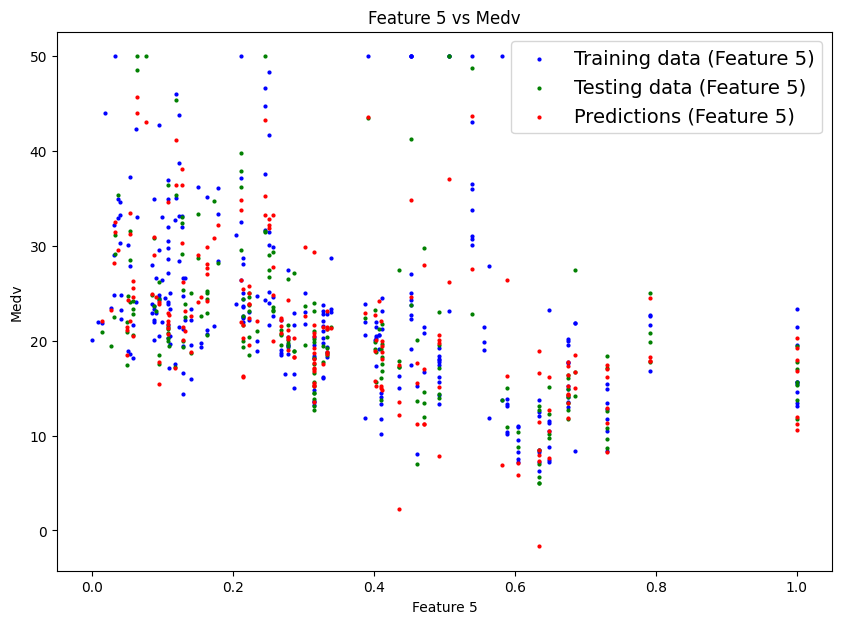

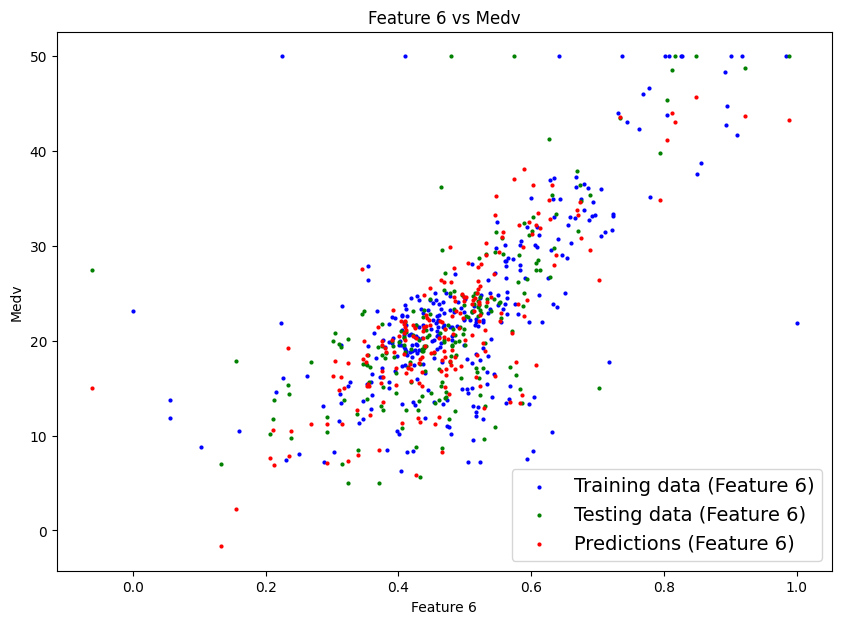

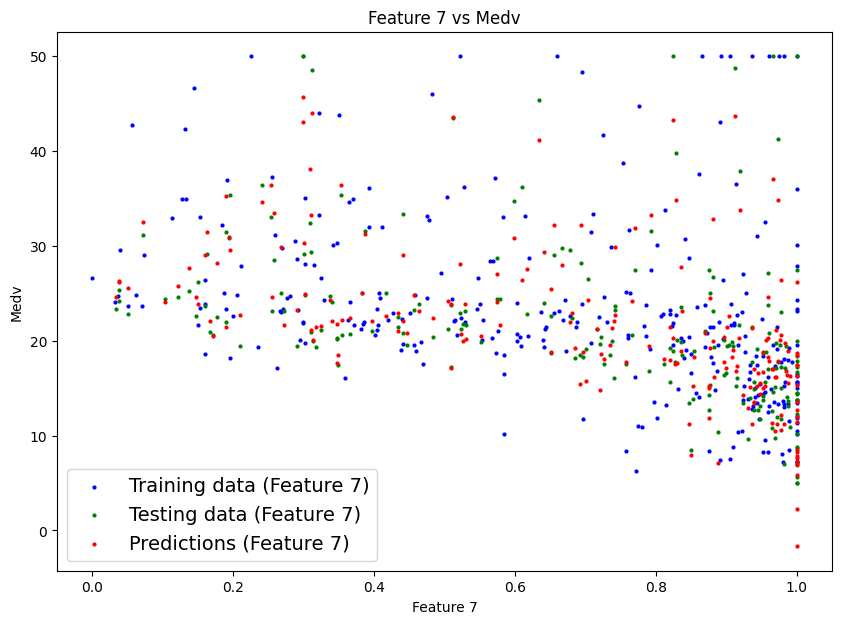

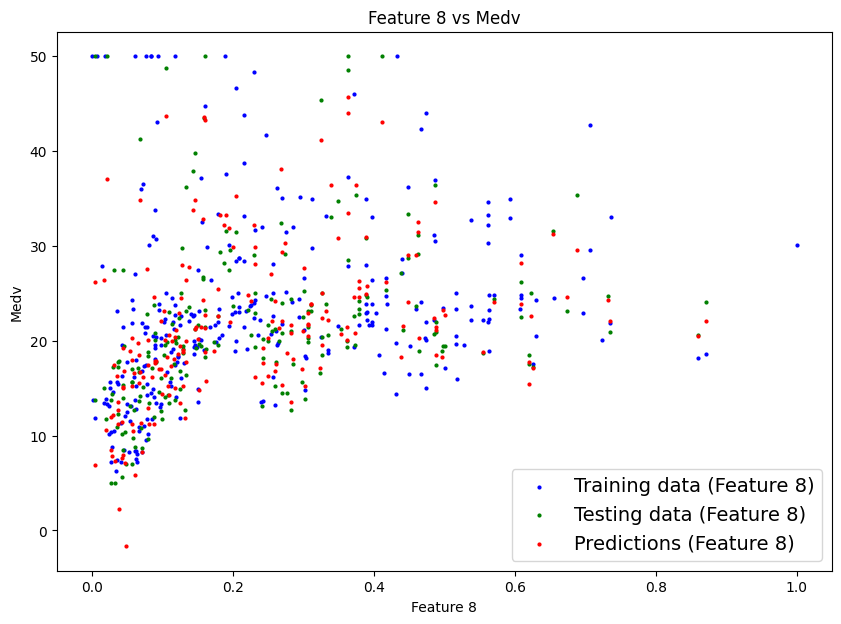

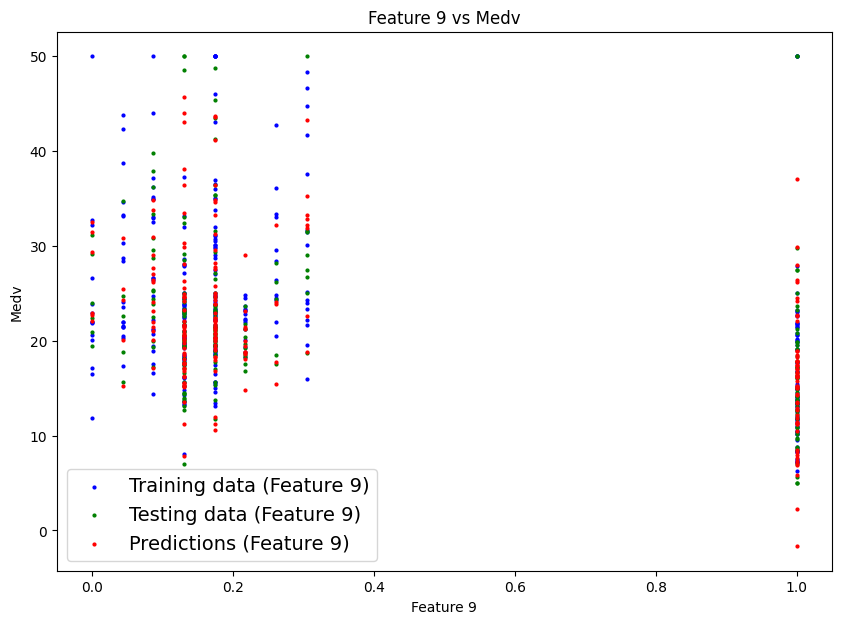

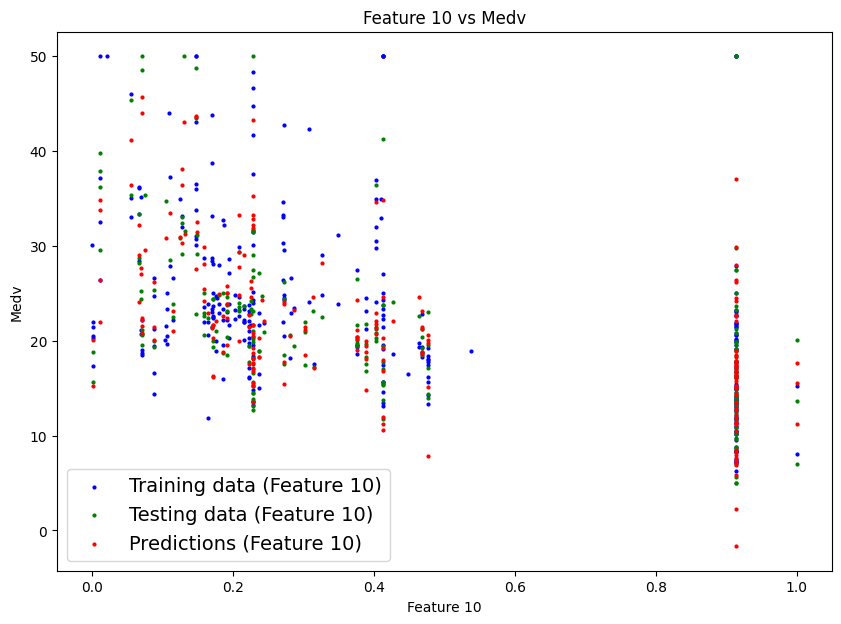

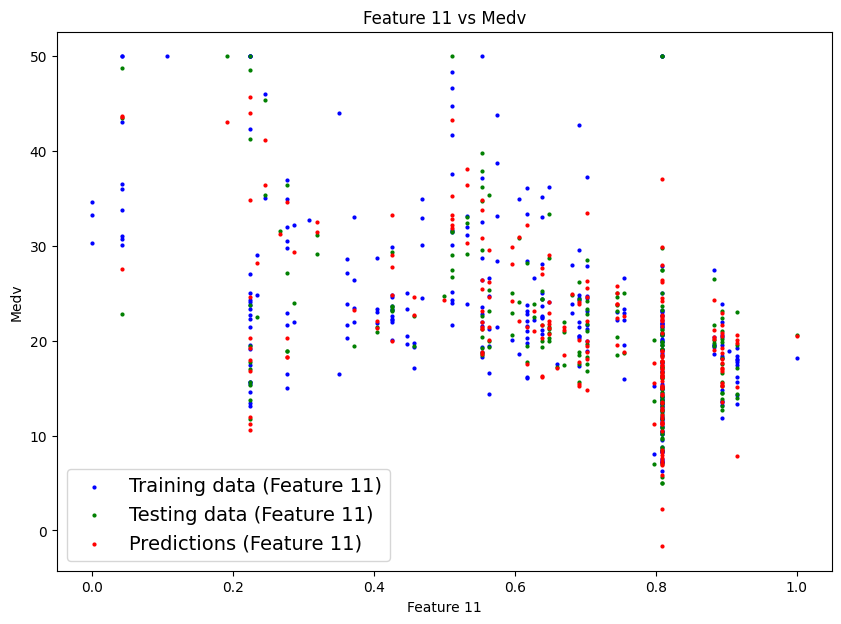

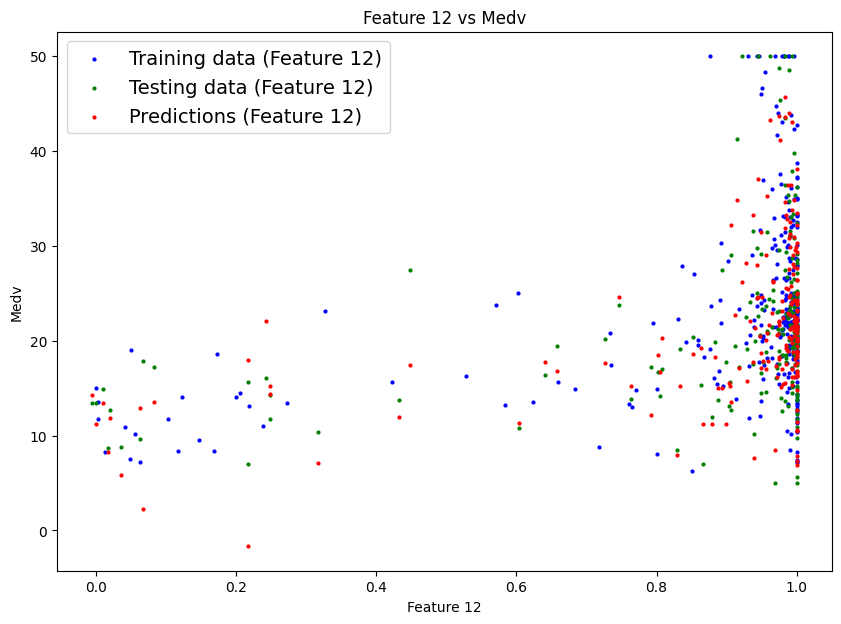

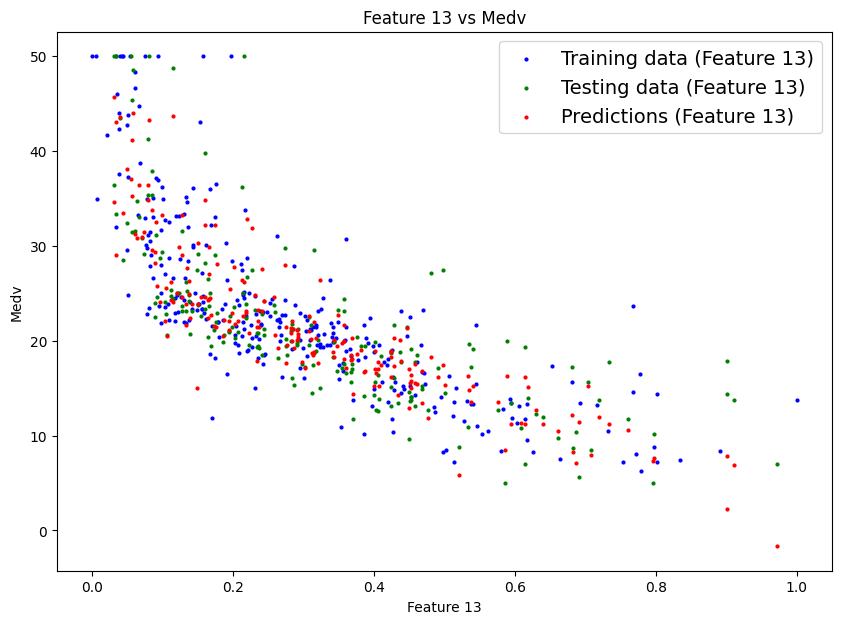

In [78]:
#check out model prediction visually
plot_predictions(predictions =y_preds.cpu() )


In [79]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "BostonHousing_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/BostonHousing_model_1.pth
